### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import utils
from utils import *
import missingno as msno
from sklearn.preprocessing import LabelEncoder

### Get dataset

In [2]:
train_tmp = pd.read_csv('../input/train.csv')

In [3]:
labels_tmp = pd.read_csv('../input/train_labels.csv')

In [4]:
train_tmp.shape

(59400, 40)

In [5]:
labels_tmp.tail()

,id,status_group
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional
59399,26348,functional


In [6]:
train_tmp.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [7]:
del labels_tmp['id']

In [8]:
train = pd.concat([train_tmp, labels_tmp], axis=1)

In [9]:
train.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non

In [10]:
train['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [11]:
test_tmp = pd.read_csv('../input/test.csv')

In [12]:
test_tmp['status_group'] = 'unknown'

In [13]:
test_tmp.shape

(14850, 41)

In [14]:
test_tmp['status_group'].value_counts()

unknown    14850
Name: status_group, dtype: int64

### Train and Test in one dataset

In [15]:
train_test = train.append(test_tmp, ignore_index=True, sort=False)

In [16]:
train_test.shape

(74250, 41)

In [17]:
train_test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


### Target distribution

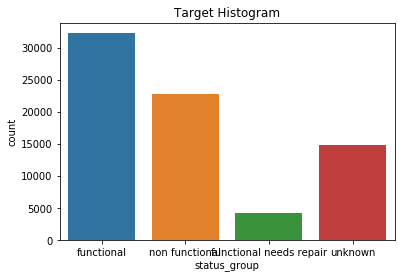

In [18]:
fig = sb.countplot(train_test['status_group'])
plt.title('Target Histogram')
plt.show(fig)

In [19]:
train_test['num_private'].value_counts()

0      73299
1         94
6         92
5         60
8         58
       ...  
30         1
669        1
668        1
213        1
62         1
Name: num_private, Length: 68, dtype: int64

In [20]:
train_test['water_quality'].value_counts()

soft                  63505
salty                  6082
unknown                2345
milky                  1005
coloured                623
salty abandoned         423
fluoride                244
fluoride abandoned       23
Name: water_quality, dtype: int64

In [21]:
train_test['quality_group'].value_counts()

good        63505
salty        6505
unknown      2345
milky        1005
colored       623
fluoride      267
Name: quality_group, dtype: int64

### There is a correlation between features 'water_quality' and 'quality_group'

In [22]:
pd.crosstab(index=train_test['water_quality'], columns=train_test['quality_group'], margins=True)

quality_group,colored,fluoride,good,milky,salty,unknown,All
water_quality,,,,,,,
coloured,623,0,0,0,0,0,623
fluoride,0,244,0,0,0,0,244
fluoride abandoned,0,23,0,0,0,0,23
milky,0,0,0,1005,0,0,1005
salty,0,0,0,0,6082,0,6082
salty abandoned,0,0,0,0,423,0,423
soft,0,0,63505,0,0,0,63505
unknown,0,0,0,0,0,2345,2345
All,623,267,63505,1005,6505,2345,74250


In [23]:
train_test['funder'].value_counts()

Government Of Tanzania    11299
Danida                     3907
Hesawa                     2782
Rwssp                      1703
World Bank                 1701
                          ...  
Makonder                      1
Aveda                         1
Kc                            1
Caltaz Kahama                 1
Tasaf And Mmem                1
Name: funder, Length: 2140, dtype: int64

In [24]:
train_test['installer'].value_counts()

DWE                   21751
Government             2282
RWE                    1498
Commu                  1347
DANIDA                 1305
                      ...  
Igolola community         1
MAISHULE                  1
Nu                        1
Said Hashim               1
Mr Jenifred Mbunda        1
Name: installer, Length: 2410, dtype: int64

In [25]:
train_test['gps_height'].min()

-90

In [26]:
train_test['wpt_name'].value_counts()

none                  4440
Shuleni               2183
Zahanati              1034
Msikitini              647
Kanisani               390
                      ... 
Kwa Tembe Jambwira       1
Abdalah Shombe           1
Simbamtoto               1
Kwa Mw/ Kulya            1
Kwa Kaboya               1
Name: wpt_name, Length: 45684, dtype: int64

In [27]:
train_test['region'].value_counts()

Iringa           6599
Shinyanga        6293
Mbeya            5758
Kilimanjaro      5494
Morogoro         5038
Kagera           4174
Arusha           4111
Mwanza           3897
Kigoma           3533
Pwani            3331
Ruvuma           3306
Tanga            3186
Dodoma           2779
Singida          2536
Tabora           2466
Mara             2451
Rukwa            2242
Mtwara           2144
Manyara          1972
Lindi            1920
Dar es Salaam    1020
Name: region, dtype: int64

In [28]:
train_test['public_meeting'].value_counts()

True     63749
False     6346
Name: public_meeting, dtype: int64

In [29]:
train_test['recorded_by'].value_counts()

GeoData Consultants Ltd    74250
Name: recorded_by, dtype: int64

In [30]:
pd.crosstab(index=train_test['scheme_management'], columns=train_test['scheme_name'], margins=True)

scheme_name,14 Kambarage,A,ADP,ADP Simbo,ADP Simbu,ADRA,AI,AIC,AIC kahunda,AMREF,...,wanging'ombe supply scheme,wanging'ombe water supply s,wanginyi water supplied sch,water supply Katungulu,water supply at Kalebejo,water supply at Nyakasungwa,water supply in Kalebejo,water supply in Mwanza,water supply in katungulu,All
scheme_management,,,,,,,,,,,,,,,,,,,,,
Company,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1301
Other,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,294
Parastatal,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,667
Private operator,0,1,0,10,2,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,440
Trust,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27
VWC,8,2,0,0,0,10,1,1,0,0,...,0,21,20,1,0,7,0,1,10,25615
WUA,0,19,0,0,0,0,0,0,0,0,...,284,302,0,0,0,0,0,0,0,2916
WUG,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,1427
Water Board,0,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3150


In [31]:
train_test['scheme_management'].value_counts()

VWC                 45917
WUG                  6496
Water authority      3975
WUA                  3551
Water Board          3462
Parastatal           2124
Company              1341
Private operator     1326
Other                 996
SWC                   123
Trust                  92
None                    1
Name: scheme_management, dtype: int64

In [32]:
train_test['construction_year'].value_counts()

0       25969
2010     3314
2008     3243
2009     3196
2000     2578
2007     1960
2006     1892
2011     1591
2003     1579
2004     1417
2012     1347
2002     1343
1995     1283
2005     1275
1978     1267
1999     1222
1998     1190
1985     1177
1990     1176
1996     1020
1980     1005
1984      970
1994      940
1982      926
1972      892
1997      821
1974      814
1992      807
1993      745
2001      680
1988      657
1983      594
1975      561
1986      553
1976      525
1970      493
1991      407
1989      396
1987      370
1981      291
1977      247
1979      245
1973      227
2013      209
1971      177
1960      124
1963      107
1967      106
1968       93
1969       77
1964       48
1962       36
1961       28
1965       21
1966       19
Name: construction_year, dtype: int64

In [33]:
pd.crosstab(index=train_test['extraction_type'], columns=train_test['extraction_type_class'], margins=True)

extraction_type_class,gravity,handpump,motorpump,other,rope pump,submersible,wind-powered,All
extraction_type,,,,,,,,
afridev,0,2208,0,0,0,0,0,2208
cemo,0,0,108,0,0,0,0,108
climax,0,0,41,0,0,0,0,41
gravity,33263,0,0,0,0,0,0,33263
india mark ii,0,3029,0,0,0,0,0,3029
india mark iii,0,135,0,0,0,0,0,135
ksb,0,0,0,0,0,1790,0,1790
mono,0,0,3628,0,0,0,0,3628
nira/tanira,0,10205,0,0,0,0,0,10205


In [34]:
pd.crosstab(index=train_test['extraction_type_class'], columns=train_test['extraction_type_group'], margins=True)

extraction_type_group,afridev,gravity,india mark ii,india mark iii,mono,nira/tanira,other,other handpump,other motorpump,rope pump,submersible,swn 80,wind-powered,All
extraction_type_class,,,,,,,,,,,,,,
gravity,0,33263,0,0,0,0,0,0,0,0,0,0,0,33263
handpump,2208,0,3029,135,0,10205,0,447,0,0,0,4588,0,20612
motorpump,0,0,0,0,3628,0,0,0,149,0,0,0,0,3777
other,0,0,0,0,0,0,8102,0,0,0,0,0,0,8102
rope pump,0,0,0,0,0,0,0,0,0,572,0,0,0,572
submersible,0,0,0,0,0,0,0,0,0,0,7772,0,0,7772
wind-powered,0,0,0,0,0,0,0,0,0,0,0,0,152,152
All,2208,33263,3029,135,3628,10205,8102,447,149,572,7772,4588,152,74250


In [35]:
pd.crosstab(index=train_test['scheme_management'], columns=train_test['management'], margins=True)

management,company,other,other - school,parastatal,private operator,trust,unknown,vwc,water authority,water board,wua,wug,All
scheme_management,,,,,,,,,,,,,
Company,848,2,0,30,287,0,0,173,0,0,0,1,1341
None,0,0,0,0,0,0,0,1,0,0,0,0,1
Other,0,690,0,1,78,1,9,49,21,0,0,147,996
Parastatal,0,0,0,1979,78,0,4,60,2,1,0,0,2124
Private operator,2,4,0,4,1208,1,0,100,5,1,0,1,1326
SWC,0,0,112,0,0,0,0,10,0,0,0,1,123
Trust,1,0,0,1,1,78,0,8,2,1,0,0,92
VWC,2,57,14,152,211,4,86,44185,9,52,138,1007,45917
WUA,1,2,0,37,240,0,1,303,0,0,2912,55,3551


In [36]:
pd.crosstab(index=train_test['payment'], columns=train_test['payment_type'], margins=True)

payment_type,annually,monthly,never pay,on failure,other,per bucket,unknown,All
payment,,,,,,,,
never pay,0,0,31712,0,0,0,0,31712
other,0,0,0,0,1314,0,0,1314
pay annually,4570,0,0,0,0,0,0,4570
pay monthly,0,10397,0,0,0,0,0,10397
pay per bucket,0,0,0,0,0,11266,0,11266
pay when scheme fails,0,0,0,4842,0,0,0,4842
unknown,0,0,0,0,0,0,10149,10149
All,4570,10397,31712,4842,1314,11266,10149,74250


In [37]:
pd.crosstab(index=train_test['water_quality'], columns=train_test['quality_group'], margins=True)

quality_group,colored,fluoride,good,milky,salty,unknown,All
water_quality,,,,,,,
coloured,623,0,0,0,0,0,623
fluoride,0,244,0,0,0,0,244
fluoride abandoned,0,23,0,0,0,0,23
milky,0,0,0,1005,0,0,1005
salty,0,0,0,0,6082,0,6082
salty abandoned,0,0,0,0,423,0,423
soft,0,0,63505,0,0,0,63505
unknown,0,0,0,0,0,2345,2345
All,623,267,63505,1005,6505,2345,74250


In [38]:
pd.crosstab(index=train_test['quantity'], columns=train_test['quantity_group'], margins=True)

quantity_group,dry,enough,insufficient,seasonal,unknown,All
quantity,,,,,,
dry,7782,0,0,0,0,7782
enough,0,41522,0,0,0,41522
insufficient,0,0,18896,0,0,18896
seasonal,0,0,0,5075,0,5075
unknown,0,0,0,0,975,975
All,7782,41522,18896,5075,975,74250


In [39]:
train_test.iloc[:, 35:38]

,source,source_type,source_class
0,spring,spring,groundwater
1,rainwater harvesting,rainwater harvesting,surface
2,dam,dam,surface
3,machine dbh,borehole,groundwater
4,rainwater harvesting,rainwater harvesting,surface
...,...,...,...
74245,river,river/lake,surface
74246,shallow well,shallow well,groundwater
74247,dam,dam,surface
74248,river,river/lake,surface


In [40]:
pd.crosstab(index=train_test['source'], columns=train_test['source_type'], margins=True)

source_type,borehole,dam,other,rainwater harvesting,river/lake,shallow well,spring,All
source,,,,,,,,
dam,0,840,0,0,0,0,0,840
hand dtw,1108,0,0,0,0,0,0,1108
lake,0,0,0,0,950,0,0,950
machine dbh,13822,0,0,0,0,0,0,13822
other,0,0,261,0,0,0,0,261
rainwater harvesting,0,0,0,2863,0,0,0,2863
river,0,0,0,0,11964,0,0,11964
shallow well,0,0,0,0,0,21140,0,21140
spring,0,0,0,0,0,0,21216,21216


In [41]:
pd.crosstab(index=train_test['source'], columns=train_test['source_class'], margins=True)

source_class,groundwater,surface,unknown,All
source,,,,
dam,0,840,0,840
hand dtw,1108,0,0,1108
lake,0,950,0,950
machine dbh,13822,0,0,13822
other,0,0,261,261
rainwater harvesting,0,2863,0,2863
river,0,11964,0,11964
shallow well,21140,0,0,21140
spring,21216,0,0,21216


In [42]:
pd.crosstab(index=train_test['source_type'], columns=train_test['source_class'], margins=True)

source_class,groundwater,surface,unknown,All
source_type,,,,
borehole,14930,0,0,14930
dam,0,840,0,840
other,0,0,347,347
rainwater harvesting,0,2863,0,2863
river/lake,0,12914,0,12914
shallow well,21140,0,0,21140
spring,21216,0,0,21216
All,57286,16617,347,74250


In [43]:
pd.crosstab(index=train_test['waterpoint_type'], columns=train_test['waterpoint_type_group'], margins=True)

waterpoint_type_group,cattle trough,communal standpipe,dam,hand pump,improved spring,other,All
waterpoint_type,,,,,,,
cattle trough,150,0,0,0,0,0,150
communal standpipe,0,35628,0,0,0,0,35628
communal standpipe multiple,0,7611,0,0,0,0,7611
dam,0,0,8,0,0,0,8
hand pump,0,0,0,21884,0,0,21884
improved spring,0,0,0,0,959,0,959
other,0,0,0,0,0,8010,8010
All,150,43239,8,21884,959,8010,74250


In [44]:
pd.crosstab(index=train_test['scheme_management'], columns=train_test['management'], margins=True)

management,company,other,other - school,parastatal,private operator,trust,unknown,vwc,water authority,water board,wua,wug,All
scheme_management,,,,,,,,,,,,,
Company,848,2,0,30,287,0,0,173,0,0,0,1,1341
None,0,0,0,0,0,0,0,1,0,0,0,0,1
Other,0,690,0,1,78,1,9,49,21,0,0,147,996
Parastatal,0,0,0,1979,78,0,4,60,2,1,0,0,2124
Private operator,2,4,0,4,1208,1,0,100,5,1,0,1,1326
SWC,0,0,112,0,0,0,0,10,0,0,0,1,123
Trust,1,0,0,1,1,78,0,8,2,1,0,0,92
VWC,2,57,14,152,211,4,86,44185,9,52,138,1007,45917
WUA,1,2,0,37,240,0,1,303,0,0,2912,55,3551


In [45]:
pd.crosstab(index=train_test['management_group'], columns=train_test['management'], margins=True)

management,company,other,other - school,parastatal,private operator,trust,unknown,vwc,water authority,water board,wua,wug,All
management_group,,,,,,,,,,,,,
commercial,859,0,0,0,2504,105,0,0,1123,0,0,0,4591
other,0,1083,126,0,0,0,0,0,0,0,0,0,1209
parastatal,0,0,0,2229,0,0,0,0,0,0,0,0,2229
unknown,0,0,0,0,0,0,683,0,0,0,0,0,683
user-group,0,0,0,0,0,0,0,50624,0,3688,3118,8108,65538
All,859,1083,126,2229,2504,105,683,50624,1123,3688,3118,8108,74250


In [46]:
train_test['funder'].value_counts()

Government Of Tanzania    11299
Danida                     3907
Hesawa                     2782
Rwssp                      1703
World Bank                 1701
                          ...  
Makonder                      1
Aveda                         1
Kc                            1
Caltaz Kahama                 1
Tasaf And Mmem                1
Name: funder, Length: 2140, dtype: int64

In [47]:
pd.crosstab(index=train_test['funder'], columns=train_test['installer'], margins=True)

installer,-,0,A.D.B,AAR,ABASIA,ABD,ABDALA,ABDUL,AC,ACORD,...,wanan,wananchi,wananchi technicians,wasab,water board,wizara ya maji,world,world banks,world vision,All
funder,,,,,,,,,,,,,,,,,,,,,
0,0,980,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,980
A/co Germany,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
Aar,0,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40
Abas Ka,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Abasia,0,0,0,0,33,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zao Water Spring X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Zara Camp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Zinduka,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### It has to be noted that when 'funder' is NaN so is 'installer'

In [48]:
len(train_test[(pd.isnull(train_test['funder'])) & (pd.isnull(train_test['installer']))])

4439

### Dataset with numeric columns

In [49]:
train_test_num = train_test.select_dtypes(include=[np.number])

In [50]:
train_test_num.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 10 columns):
id                   74250 non-null int64
amount_tsh           74250 non-null float64
gps_height           74250 non-null int64
longitude            74250 non-null float64
latitude             74250 non-null float64
num_private          74250 non-null int64
region_code          74250 non-null int64
district_code        74250 non-null int64
population           74250 non-null int64
construction_year    74250 non-null int64
dtypes: float64(3), int64(7)
memory usage: 5.7 MB


### amount_tsh feasture

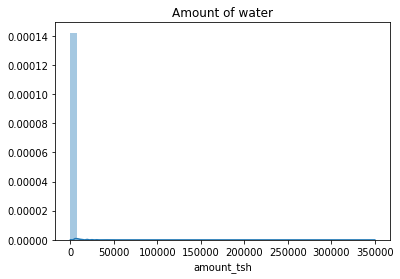

In [51]:
fig = sb.distplot(train_test_num['amount_tsh'])
plt.title('Amount of water')
plt.show(fig)

In [52]:
train_test['amt'] = np.log(train_test['amount_tsh']+1)

In [53]:
train_test['amt_q3'] = 0


In [54]:
train_test.loc[(train_test['amt'] > 3.044), 'amt_q3'] = 1

In [55]:
train_test.loc[:, 'amt_q3'].value_counts()

0    53880
1    20370
Name: amt_q3, dtype: int64

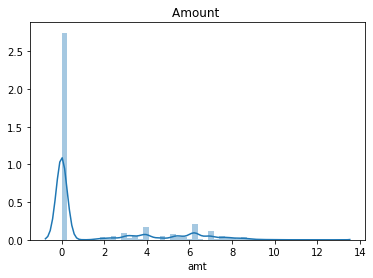

In [56]:
fig = sb.distplot(train_test['amt'])
plt.title('Amount ')
plt.show(fig)

In [57]:
del train_test['amount_tsh']

### GPS height

In [58]:
train_test_num['gps_height'].describe()

count    74250.000000
mean       665.667313
std        692.761033
min        -90.000000
25%          0.000000
50%        364.000000
75%       1317.000000
max       2777.000000
Name: gps_height, dtype: float64

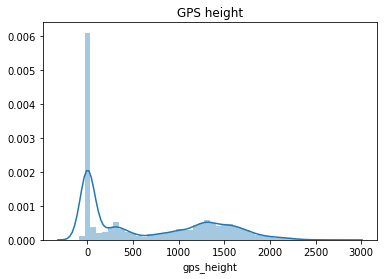

In [59]:
fig = sb.distplot(train_test_num['gps_height'])
plt.title('GPS height')
plt.show(fig)

In [60]:
train_test_num['num_private'].value_counts()

0      73299
1         94
6         92
5         60
8         58
       ...  
30         1
669        1
668        1
213        1
62         1
Name: num_private, Length: 68, dtype: int64

In [61]:
del train_test['num_private']

### Feature population

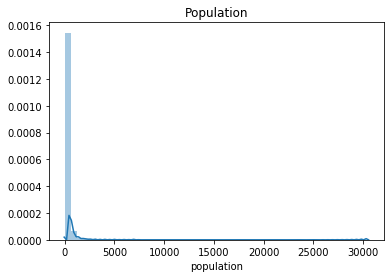

In [62]:
fig = sb.distplot(train_test_num['population'])
plt.title('Population')
plt.show(fig)

In [63]:
train_test['pop1'] = np.log(train_test['population']+1)

In [64]:
train_test.loc[:, 'pop1'].describe()

count    74250.000000
mean         2.813878
std          2.664818
min          0.000000
25%          0.000000
50%          3.258097
75%          5.375278
max         10.325515
Name: pop1, dtype: float64

In [65]:
train_test['pop_below'] = 0
train_test.loc[(train_test['pop1'] < 2), 'pop_below'] = 1

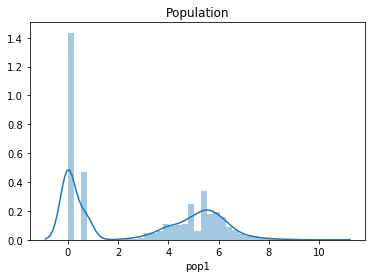

In [66]:
fig = sb.distplot(train_test['pop1'])
plt.title('Population')
plt.show(fig)

In [67]:
del train_test['population']

In [68]:
train_test.iloc[:, 10:17]

,region,region_code,district_code,lga,ward,public_meeting,recorded_by
0,Iringa,11,5,Ludewa,Mundindi,True,GeoData Consultants Ltd
1,Mara,20,2,Serengeti,Natta,NaN,GeoData Consultants Ltd
2,Manyara,21,4,Simanjiro,Ngorika,True,GeoData Consultants Ltd
3,Mtwara,90,63,Nanyumbu,Nanyumbu,True,GeoData Consultants Ltd
4,Kagera,18,1,Karagwe,Nyakasimbi,True,GeoData Consultants Ltd
...,...,...,...,...,...,...,...
74245,Pwani,6,1,Bagamoyo,Yombo,True,GeoData Consultants Ltd
74246,Tanga,4,7,Kilindi,Mvungwe,True,GeoData Consultants Ltd
74247,Singida,13,2,Singida Rural,Ughandi,True,GeoData Consultants Ltd
74248,Ruvuma,10,2,Songea Rural,Maposeni,True,GeoData Consultants Ltd


In [69]:
train_test.groupby(['region'])['lga'].count().head(40)

region
Arusha           4111
Dar es Salaam    1020
Dodoma           2779
Iringa           6599
Kagera           4174
Kigoma           3533
Kilimanjaro      5494
Lindi            1920
Manyara          1972
Mara             2451
Mbeya            5758
Morogoro         5038
Mtwara           2144
Mwanza           3897
Pwani            3331
Rukwa            2242
Ruvuma           3306
Shinyanga        6293
Singida          2536
Tabora           2466
Tanga            3186
Name: lga, dtype: int64

In [70]:
del train_test['recorded_by']

In [71]:
train_test_cat = train_test.select_dtypes(include=[np.object])

In [72]:
df1 = pd.DataFrame(corr_categories(train_test_cat))

In [73]:
df1.head(50)

,Var1,Var2,Corr_Cat
569,payment_type,payment,1.000000
839,waterpoint_type_group,waterpoint_type,1.000000
749,source_type,source,1.000000
689,quantity_group,quantity,1.000000
660,quantity,quantity_group,1.000000
419,extraction_type_group,extraction_type,1.000000
629,quality_group,water_quality,1.000000
779,source_class,source_type,1.000000
180,region,lga,1.000000
448,extraction_type_class,extraction_type,1.000000


In [74]:
df1.loc[(df1['Var1'] == 'public_meeting')]

,Var1,Var2,Corr_Cat
264,public_meeting,wpt_name,0.702021
266,public_meeting,subvillage,0.669291
269,public_meeting,ward,0.625288
268,public_meeting,lga,0.378560
271,public_meeting,scheme_name,0.293300
263,public_meeting,installer,0.250640
262,public_meeting,funder,0.238549
267,public_meeting,region,0.157316
261,public_meeting,date_recorded,0.139966
276,public_meeting,management,0.114335


In [75]:
train_test.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 41 columns):
id                       74250 non-null int64
date_recorded            74250 non-null object
funder                   69746 non-null object
gps_height               74250 non-null int64
installer                69718 non-null object
longitude                74250 non-null float64
latitude                 74250 non-null float64
wpt_name                 74250 non-null object
basin                    74250 non-null object
subvillage               73780 non-null object
region                   74250 non-null object
region_code              74250 non-null int64
district_code            74250 non-null int64
lga                      74250 non-null object
ward                     74250 non-null object
public_meeting           70095 non-null object
scheme_management        69404 non-null object
scheme_name              38992 non-null object
permit                   70457 no

In [76]:
columns = ['region', 'lga', 'ward', 'extraction_type_group', 'management_group',
'payment', 'water_quality', 'quantity_group', 'source_type', 'waterpoint_type_group']
train_test.drop(columns, inplace=True, axis=1)

### NaN value treatment

In [77]:
train_test.isnull().sum()

id                           0
date_recorded                0
funder                    4504
gps_height                   0
installer                 4532
longitude                    0
latitude                     0
wpt_name                     0
basin                        0
subvillage                 470
region_code                  0
district_code                0
public_meeting            4155
scheme_management         4846
scheme_name              35258
permit                    3793
construction_year            0
extraction_type              0
extraction_type_class        0
management                   0
payment_type                 0
quality_group                0
quantity                     0
source                       0
source_class                 0
waterpoint_type              0
status_group                 0
amt                          0
amt_q3                       0
pop1                         0
pop_below                    0
dtype: int64

&lt;matplotlib.axes._subplots.AxesSubplot at 0x12ff936d0&gt;

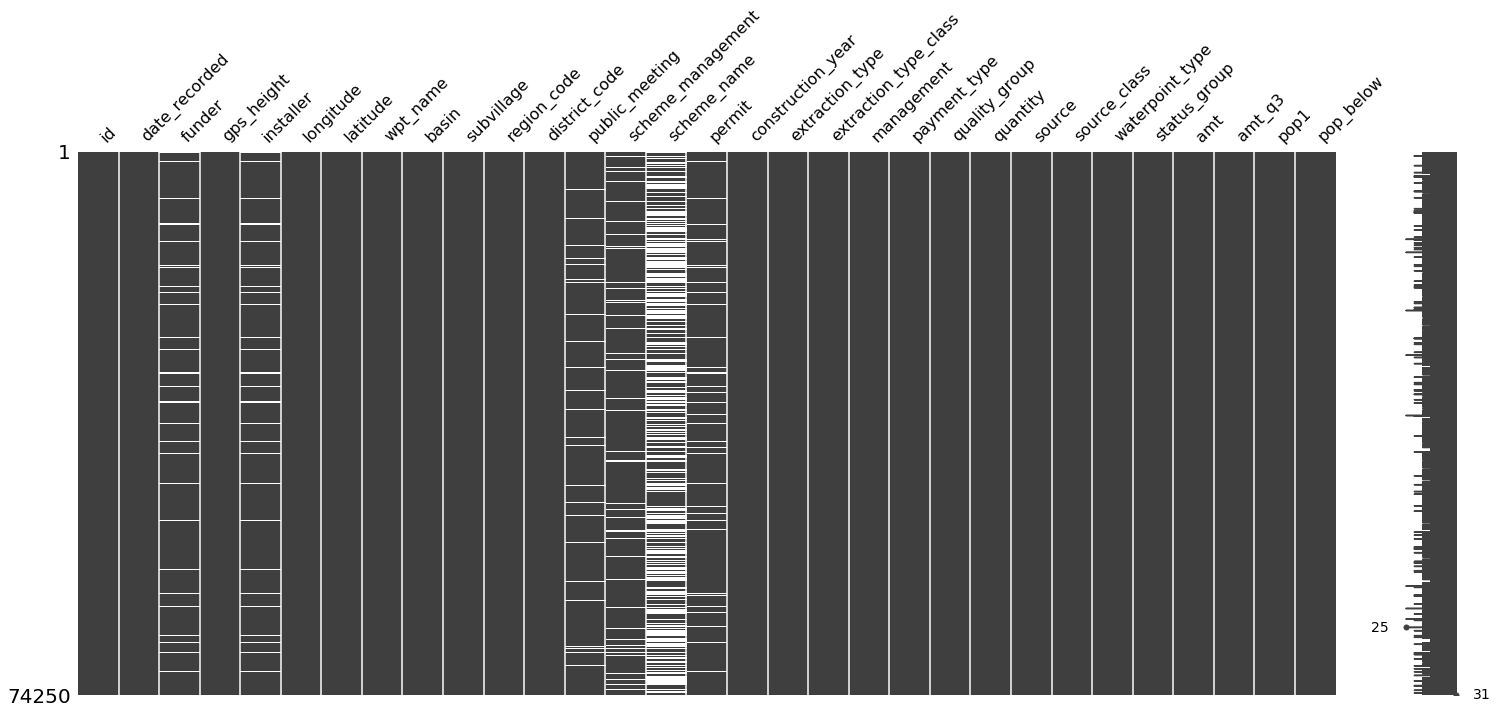

In [78]:
msno.matrix(train_test)

In [79]:
train_test.loc[:, 'public_meeting'].value_counts(dropna=False)

True     63749
False     6346
NaN       4155
Name: public_meeting, dtype: int64

In [80]:
train_test.loc[:, 'scheme_management'].value_counts(dropna=False)

VWC                 45917
WUG                  6496
NaN                  4846
Water authority      3975
WUA                  3551
Water Board          3462
Parastatal           2124
Company              1341
Private operator     1326
Other                 996
SWC                   123
Trust                  92
None                    1
Name: scheme_management, dtype: int64

In [81]:
train_test.loc[:, ['scheme_name', 'scheme_management']]

,scheme_name,scheme_management
0,Roman,VWC
1,NaN,Other
2,Nyumba ya mungu pipe scheme,VWC
3,NaN,VWC
4,NaN,NaN
...,...,...
74245,Bagamoyo wate,VWC
74246,NaN,VWC
74247,NaN,VWC
74248,Mradi wa maji wa maposeni,VWC


In [82]:
df1 = train_test.loc[:, ['scheme_name', 'scheme_management']]

In [83]:
df1.head()

,scheme_name,scheme_management
0,Roman,VWC
1,NaN,Other
2,Nyumba ya mungu pipe scheme,VWC
3,NaN,VWC
4,NaN,NaN


In [84]:
df2=df1.dropna()

In [85]:
df2.shape

(38629, 2)

### It is seen that there is a correlation between scheme_name and scheme_management when we get rid of NaN, so delete scheme_name

In [86]:
corr_categories(df2)

,Var1,Var2,Corr_Cat
1,scheme_management,scheme_name,0.865855
0,scheme_name,scheme_management,0.159429


In [87]:
del train_test['scheme_name']

### Feature: funder

In [88]:
train_test['funder'].fillna(value='Unknown',inplace=True)
train_test['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)
train_test['funder'].value_counts().head(20)

Government Of Tanzania    11299
Unknown                    5489
Danida                     3907
Hesawa                     2782
Rwssp                      1703
World Bank                 1701
Kkkt                       1623
World Vision               1562
Unicef                     1324
Tasaf                      1136
Dhv                        1065
District Council           1037
Private Individual         1034
Dwsp                       1012
Norad                       949
Germany Republi             765
Water                       739
Tcrs                        735
Ministry Of Water           728
Dwe                         605
Name: funder, dtype: int64

In [89]:
df1 = train_test.loc[train_test['funder']== 'Government Of Tanzania']
df2 = train_test.loc[train_test['funder']== 'Unknown']              
df3 = train_test.loc[train_test['funder']== 'Danida'] 
df4 = train_test.loc[train_test['funder']== 'Hesawa'] 
df5 = train_test.loc[train_test['funder']== 'Rwssp'] 
df6 = train_test.loc[train_test['funder']== 'World Bank'] 
df7 = train_test.loc[train_test['funder']== 'Kkkt'] 
df8 = train_test.loc[train_test['funder']== 'World Vision']
df9 = train_test.loc[train_test['funder']== 'Unicef'] 
df10 = train_test.loc[train_test['funder']== 'Tasaf'] 
df11 = train_test.loc[train_test['funder']== 'District Council'] 
df12 = train_test.loc[train_test['funder']== 'Dhv'] 
df13 = train_test.loc[train_test['funder']== 'Private Individual'] 
df14 = train_test.loc[train_test['funder']== 'Dwsp'] 
df15 = train_test.loc[train_test['funder']== 'Norad'] 
df16 = train_test.loc[train_test['funder']== 'Germany Republi']
df17 = train_test.loc[train_test['funder']== 'Tcrs']
df18 = train_test.loc[train_test['funder']== 'Ministry Of Water']
df19 = train_test.loc[train_test['funder']== 'Water']
df20 = train_test.loc[train_test['funder']== 'Dwe']


In [90]:
df_funder = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,
df11,df12,df13,df14,df15,df16,df17,df18,df19,df20], ignore_index=True)


In [91]:
df_funder.shape

(41195, 30)

[Text(0, 0, &#39;Government Of Tanzania&#39;),
 Text(0, 0, &#39;Unknown&#39;),
 Text(0, 0, &#39;Danida&#39;),
 Text(0, 0, &#39;Hesawa&#39;),
 Text(0, 0, &#39;Rwssp&#39;),
 Text(0, 0, &#39;World Bank&#39;),
 Text(0, 0, &#39;Kkkt&#39;),
 Text(0, 0, &#39;World Vision&#39;),
 Text(0, 0, &#39;Unicef&#39;),
 Text(0, 0, &#39;Tasaf&#39;),
 Text(0, 0, &#39;District Council&#39;),
 Text(0, 0, &#39;Dhv&#39;),
 Text(0, 0, &#39;Private Individual&#39;),
 Text(0, 0, &#39;Dwsp&#39;),
 Text(0, 0, &#39;Norad&#39;),
 Text(0, 0, &#39;Germany Republi&#39;),
 Text(0, 0, &#39;Tcrs&#39;),
 Text(0, 0, &#39;Ministry Of Water&#39;),
 Text(0, 0, &#39;Water&#39;),
 Text(0, 0, &#39;Dwe&#39;)]

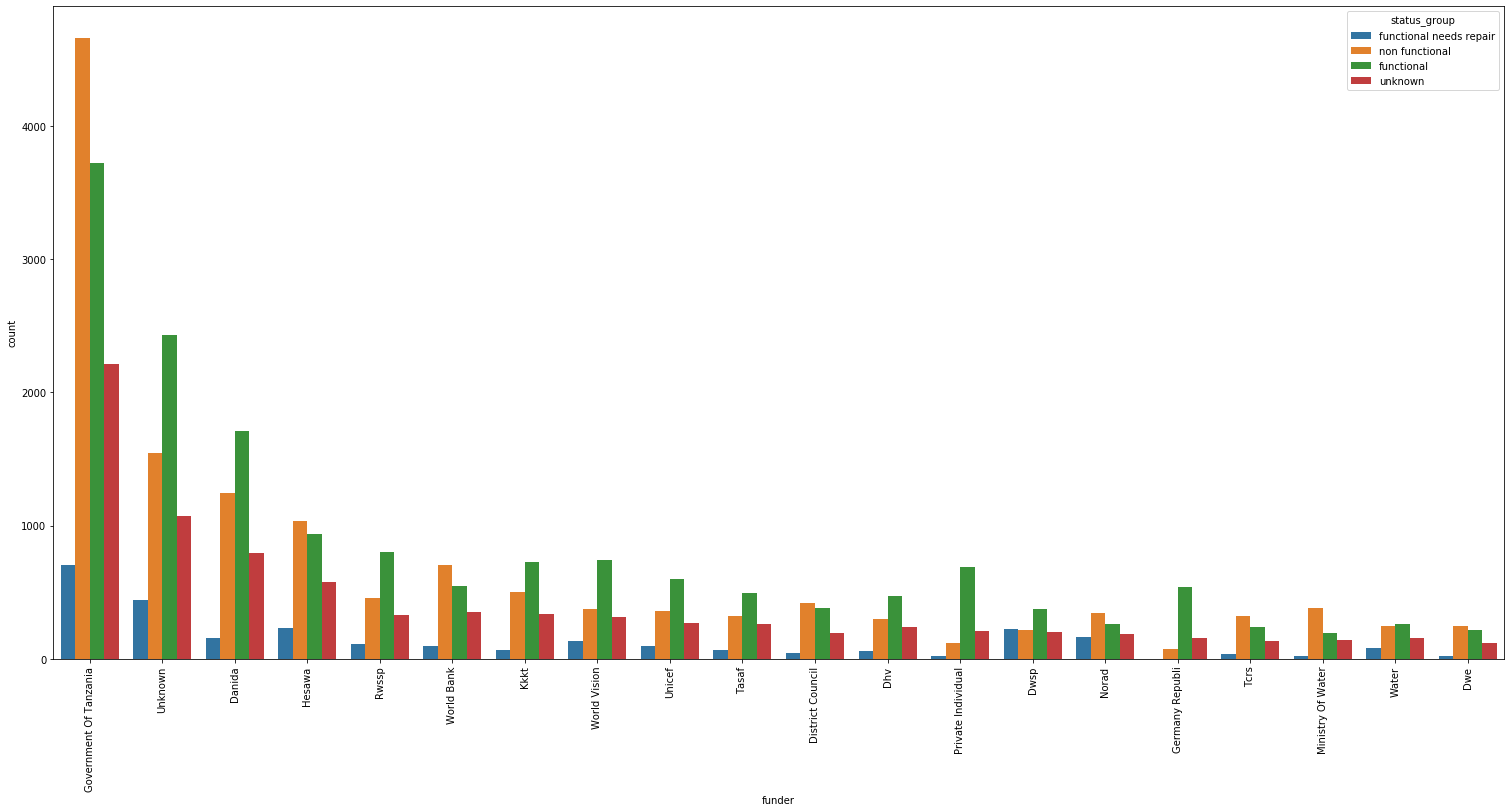

In [92]:
plt.figure(figsize=(26,12))
ax = sb.countplot(x='funder', hue="status_group", data=df_funder)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [93]:
# To collect values together
train_test['funder_cat'] = train_test['funder'] #creating new column
c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe']

train_test.loc[~train_test["funder_cat"].isin(c_fund), "funder_cat"] = "Others"
train_test['funder_cat'].nunique() # We have 21 unique values for this column

21

In [94]:
train_test.loc[:, 'funder_cat'].value_counts()

Others                    33055
Government Of Tanzania    11299
Unknown                    5489
Danida                     3907
Hesawa                     2782
Rwssp                      1703
World Bank                 1701
Kkkt                       1623
World Vision               1562
Unicef                     1324
Tasaf                      1136
Dhv                        1065
District Council           1037
Private Individual         1034
Dwsp                       1012
Norad                       949
Germany Republi             765
Water                       739
Tcrs                        735
Ministry Of Water           728
Dwe                         605
Name: funder_cat, dtype: int64

In [95]:
del train_test['funder']

### Feature: installer

In [96]:
train_test['installer'].fillna(value='Unknown',inplace=True)  # filling null values with unknown
train_test['installer'].value_counts().head(100).sum() # to check the first common 100 values sum
train_test['installer'].replace(to_replace = '0', value ='Unknown' , inplace=True) # filling 0 values with unknown

In [97]:
# Replacing the spelling mistakes and collect same categories in same name

train_test['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),      value ='District water department' , inplace=True)

train_test['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
train_test['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

train_test['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci',                    'District Council','Council','Counc','District  Council','Distri'), value ='District council' , inplace=True)

train_test['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C','RC CH','RC church','RC CATHORIC',) ,value ='RC Church' , inplace=True)

train_test['installer'].replace(to_replace = ('Central Government','Tanzania Government', 'central government',
'Cental Government', 'Cebtral Government', 'Tanzanian Government','Tanzania government', 'Centra Government',
'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 'Centra govt') , value ='Central government' , inplace=True)

train_test['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),value ='world vision' , inplace=True)

train_test['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
train_test['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

train_test['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi',        'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 'Villaers','Village Community', 'Villag','Villege Council', 'Village council','Village  Council','Villagerd','Villager', 'Village Technician', 'Village Office','Village community members'),value ='villagers' , inplace=True)

train_test['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY'), value ='Community' , inplace=True)

train_test['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove', 
'Governme','Governmen' ) ,value ='Government' , inplace=True)

train_test['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

In [98]:
# continue to replacing spelling mistakes and getting together values
train_test['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
train_test['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
train_test['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
train_test['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
train_test['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
train_test['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
train_test['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
train_test['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
train_test['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') ,
value ='TCRS /Government' , inplace=True)
train_test['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)


In [99]:
df_1 = train_test.loc[train_test['installer']== 'DWE']
df_2 = train_test.loc[train_test['installer']== 'Unknown']              
df_3 = train_test.loc[train_test['installer']== 'Government'] 
df_4 = train_test.loc[train_test['installer']== 'Community'] 
df_5 = train_test.loc[train_test['installer']== 'DANIDA'] 
df_6 = train_test.loc[train_test['installer']== 'RWE'] 
df_7 = train_test.loc[train_test['installer']== 'District council'] 
df_8 = train_test.loc[train_test['installer']== 'Central government']
df_9 = train_test.loc[train_test['installer']== 'KKKT'] 
df_10 = train_test.loc[train_test['installer']== 'HESAWA'] 
df_11 = train_test.loc[train_test['installer']== 'TCRS'] 
df_12 = train_test.loc[train_test['installer']== 'world vision'] 
df_13 = train_test.loc[train_test['installer']== 'CES'] 
df_14 = train_test.loc[train_test['installer']== 'Fini Water'] 
df_15 = train_test.loc[train_test['installer']== 'RC Church'] 
df_16 = train_test.loc[train_test['installer']== 'villagers']
df_17 = train_test.loc[train_test['installer']== 'LGA']

In [100]:
df_installer = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,
                          df_13,df_14,df_15,df_16,df_17], ignore_index=True)


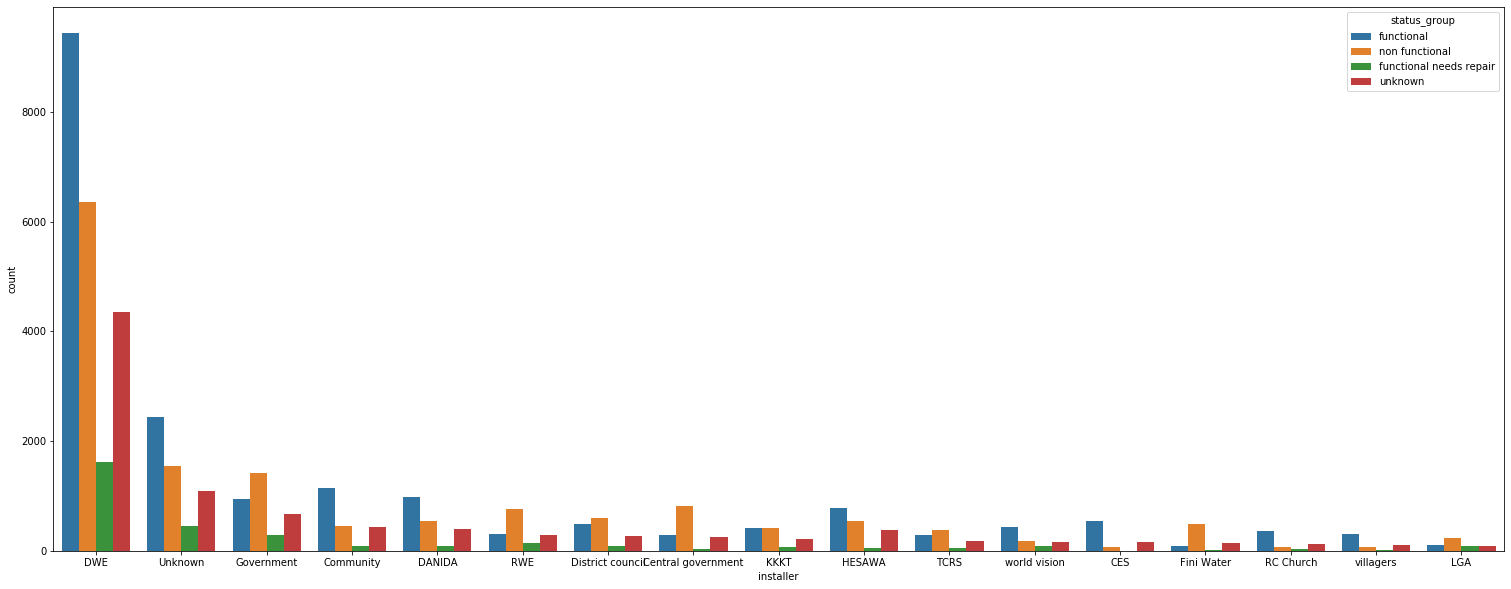

In [101]:
plt.figure(figsize=(26,10))
ax = sb.countplot(x='installer', hue="status_group", data=df_installer)

In [102]:
train_test['installer_cat'] = train_test['installer'] # To make new categorizes, creating new column
c_ins = ['DWE','Unknown','Government','Community','DANIDA','RWE','District council', 'Central government',
         'KKKT','HESAWA','TCRS', 'world vision', 'Fini Water', 'RC Church','villagers','LGA']

train_test.loc[~train_test["installer_cat"].isin(c_ins), "installer_cat"] = "Others"
# converting the values which has less than 400 value counts to others


In [103]:
del train_test['installer']

&lt;matplotlib.axes._subplots.AxesSubplot at 0x134d872d0&gt;

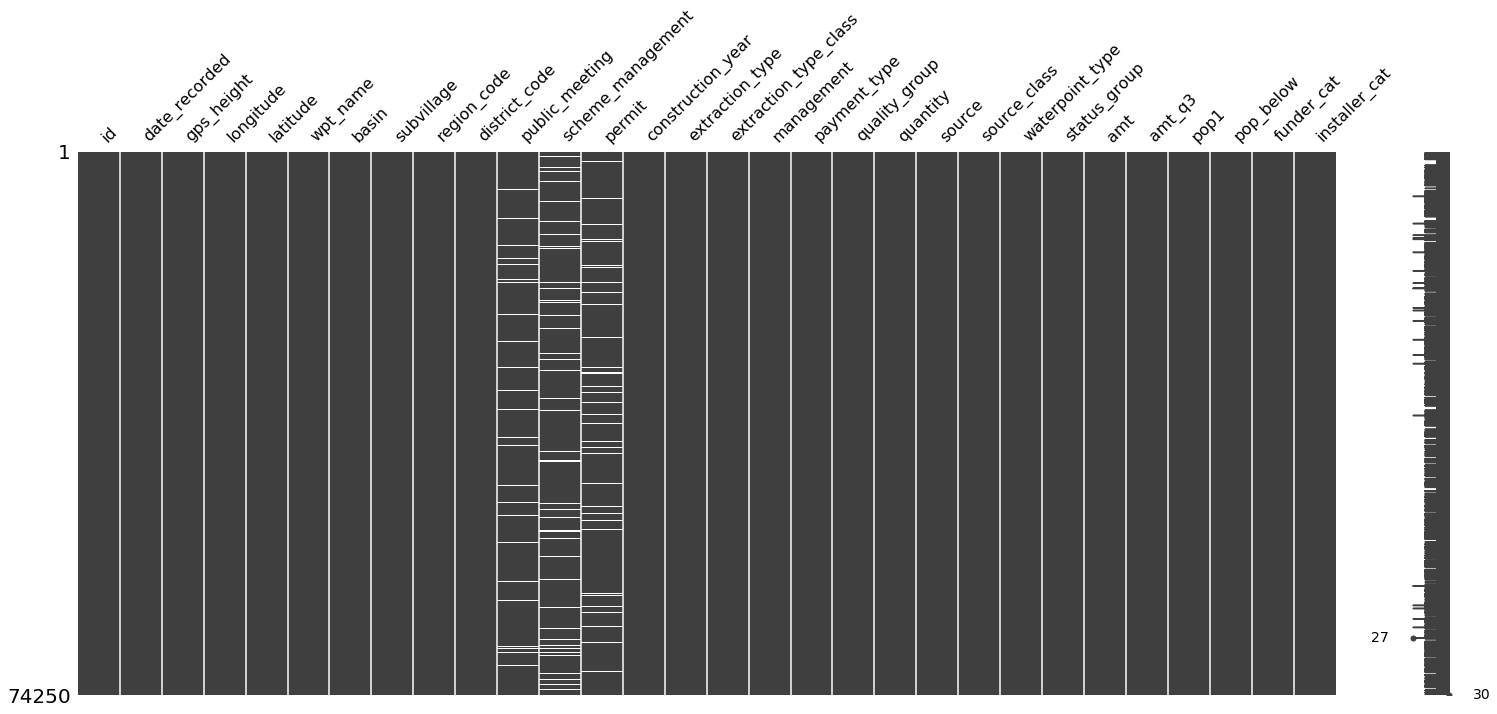

In [104]:
msno.matrix(train_test)

In [105]:
train_test.loc[:, 'permit'].value_counts(dropna=False)

True     48606
False    21851
NaN       3793
Name: permit, dtype: int64

In [106]:
train_test['permit'].fillna(True, inplace=True)

In [107]:
train_test.loc[:, 'public_meeting'].value_counts(dropna=False)

True     63749
False     6346
NaN       4155
Name: public_meeting, dtype: int64

In [108]:
train_test['public_meeting'].fillna(True, inplace=True)

In [109]:
train_test.loc[:, 'scheme_management'].value_counts(dropna=False)

VWC                 45917
WUG                  6496
NaN                  4846
Water authority      3975
WUA                  3551
Water Board          3462
Parastatal           2124
Company              1341
Private operator     1326
Other                 996
SWC                   123
Trust                  92
None                    1
Name: scheme_management, dtype: int64

In [110]:
train_test['scheme_management'].fillna('VWC', inplace=True)

In [111]:
train_test.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 30 columns):
id                       74250 non-null int64
date_recorded            74250 non-null object
gps_height               74250 non-null int64
longitude                74250 non-null float64
latitude                 74250 non-null float64
wpt_name                 74250 non-null object
basin                    74250 non-null object
subvillage               73780 non-null object
region_code              74250 non-null int64
district_code            74250 non-null int64
public_meeting           74250 non-null bool
scheme_management        74250 non-null object
permit                   74250 non-null bool
construction_year        74250 non-null int64
extraction_type          74250 non-null object
extraction_type_class    74250 non-null object
management               74250 non-null object
payment_type             74250 non-null object
quality_group            74250 non-nul

### Date convertion

In [112]:
train_test.loc[:, 'date_recorded'].head()

0    2011-03-14
1    2013-03-06
2    2013-02-25
3    2013-01-28
4    2011-07-13
Name: date_recorded, dtype: object

In [113]:
train_test['date'] = pd.to_datetime(train_test['date_recorded'], format='%Y-%m-%d %H:%M:%S')

In [114]:
del train_test['date_recorded']

In [115]:
train_test['year'] = pd.DatetimeIndex(train_test['date']).year
train_test['month'] = pd.DatetimeIndex(train_test['date']).month

In [116]:
train_test.loc[:, 'date'].head()

0   2011-03-14
1   2013-03-06
2   2013-02-25
3   2013-01-28
4   2011-07-13
Name: date, dtype: datetime64[ns]

In [117]:
del train_test['date']


In [118]:
train_test.loc[:, 'wpt_name'].value_counts()

none                  4440
Shuleni               2183
Zahanati              1034
Msikitini              647
Kanisani               390
                      ... 
Kwa Tembe Jambwira       1
Abdalah Shombe           1
Simbamtoto               1
Kwa Mw/ Kulya            1
Kwa Kaboya               1
Name: wpt_name, Length: 45684, dtype: int64

In [119]:
train_test['wpt_name1'] = 1

In [120]:
train_test.loc[(train_test['wpt_name'] == 'none'), 'wpt_name1'] = 0

In [121]:
train_test.loc[:, 'wpt_name1'].value_counts()

1    69810
0     4440
Name: wpt_name1, dtype: int64

In [122]:
del train_test['wpt_name']

In [123]:
train_test.nunique()

id                       74250
gps_height                2456
longitude                71870
latitude                 71869
basin                        9
subvillage               21425
region_code                 27
district_code               20
public_meeting               2
scheme_management           12
permit                       2
construction_year           55
extraction_type             18
extraction_type_class        7
management                  12
payment_type                 7
quality_group                6
quantity                     5
source                      10
source_class                 3
waterpoint_type              7
status_group                 4
amt                        102
amt_q3                       2
pop1                      1128
pop_below                    2
funder_cat                  21
installer_cat               17
year                         6
month                       12
wpt_name1                    2
dtype: int64

In [124]:
train_test.iloc[:, 0:10].head()

,id,gps_height,longitude,latitude,basin,subvillage,region_code,district_code,public_meeting,scheme_management
0,69572,1390,34.938093,-9.856322,Lake Nyasa,Mnyusi B,11,5,True,VWC
1,8776,1399,34.698766,-2.147466,Lake Victoria,Nyamara,20,2,True,Other
2,34310,686,37.460664,-3.821329,Pangani,Majengo,21,4,True,VWC
3,67743,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,90,63,True,VWC
4,19728,0,31.130847,-1.825359,Lake Victoria,Kyanyamisa,18,1,True,VWC


In [125]:
train_test.iloc[:, 11:20].head()

,construction_year,extraction_type,extraction_type_class,management,payment_type,quality_group,quantity,source,source_class
0,1999,gravity,gravity,vwc,annually,good,enough,spring,groundwater
1,2010,gravity,gravity,wug,never pay,good,insufficient,rainwater harvesting,surface
2,2009,gravity,gravity,vwc,per bucket,good,enough,dam,surface
3,1986,submersible,submersible,vwc,never pay,good,dry,machine dbh,groundwater
4,0,gravity,gravity,other,never pay,good,seasonal,rainwater harvesting,surface


In [126]:
train_test.iloc[:, 21:].head()

,status_group,amt,amt_q3,pop1,pop_below,funder_cat,installer_cat,year,month,wpt_name1
0,functional,8.699681,1,4.700480,0,Others,Others,2011,3,0
1,functional,0.000000,0,5.638355,0,Others,Others,2013,3,1
2,functional,3.258097,1,5.525453,0,Others,world vision,2013,2,1
3,non functional,0.000000,0,4.077537,0,Unicef,Others,2013,1,1
4,functional,0.000000,0,0.000000,1,Others,Others,2011,7,1


In [127]:
train_test.loc[:, 'year'].value_counts()

2011    35908
2013    30210
2012     8089
2004       41
2002        1
2001        1
Name: year, dtype: int64

In [128]:
df1 = pd.DataFrame(train_test.loc[(train_test['construction_year'] != 0)][['year', 'construction_year']])

In [129]:
df1.loc[:, 'year'].value_counts()

2013    27451
2011    19206
2012     1599
2004       24
2001        1
Name: year, dtype: int64

In [130]:
df1['age'] = df1['year'] - df1['construction_year']

In [131]:
np.mean(df1.loc[:, 'age'])

15.295623537209254

&lt;matplotlib.axes._subplots.AxesSubplot at 0x12fe4f350&gt;

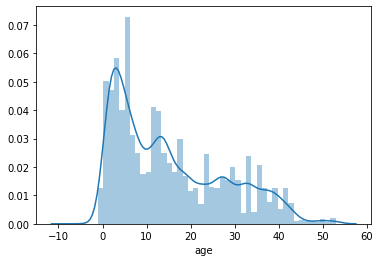

In [132]:
sb.distplot(df1.loc[:, 'age'])

In [133]:
train_test.loc[:, ['year', 'construction_year']]

,year,construction_year
0,2011,1999
1,2013,2010
2,2013,2009
3,2013,1986
4,2011,0
...,...,...
74245,2011,1988
74246,2011,1994
74247,2013,2010
74248,2013,2009


In [134]:
# Because of the graphics shows a skewed dist, then 5 is used insted of 15 that is the mean
train_test['age'] = 0
for i in range(train_test.shape[0]):
    if train_test.loc[i, 'construction_year'] == 0:
        train_test.loc[i, 'construction_year'] = train_test.loc[i, 'year'] - 5
        train_test.loc[i, 'age'] = train_test.loc[i, 'year'] - train_test.loc[i, 'construction_year']
    else:
        train_test.loc[i, 'age'] = train_test.loc[i, 'year'] - train_test.loc[i, 'construction_year']



In [135]:
train_test.loc[:, ['year', 'construction_year', 'age']]

,year,construction_year,age
0,2011,1999,12
1,2013,2010,3
2,2013,2009,4
3,2013,1986,27
4,2011,2006,5
...,...,...,...
74245,2011,1988,23
74246,2011,1994,17
74247,2013,2010,3
74248,2013,2009,4


In [136]:
train_test['amt_pop']=train_test.loc[:, 'amt']/(train_test.loc[:, 'pop1']+0.4)

In [137]:
del train_test['subvillage']

### One-hot encoding

In [138]:
train_test.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 32 columns):
id                       74250 non-null int64
gps_height               74250 non-null int64
longitude                74250 non-null float64
latitude                 74250 non-null float64
basin                    74250 non-null object
region_code              74250 non-null int64
district_code            74250 non-null int64
public_meeting           74250 non-null bool
scheme_management        74250 non-null object
permit                   74250 non-null bool
construction_year        74250 non-null int64
extraction_type          74250 non-null object
extraction_type_class    74250 non-null object
management               74250 non-null object
payment_type             74250 non-null object
quality_group            74250 non-null object
quantity                 74250 non-null object
source                   74250 non-null object
source_class             74250 non-nul

In [139]:
columns = ['funder_cat', 'basin', 'installer_cat','public_meeting', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_class', 'management', 'payment_type', 'quality_group', 'quantity', 'source', 'source_class', 'waterpoint_type']

In [140]:
train_test = pd.get_dummies(train_test, prefix_sep="_", columns=columns, drop_first=True)

In [141]:
train_test

,id,gps_height,longitude,latitude,region_code,district_code,construction_year,status_group,amt,amt_q3,...,source_spring,source_unknown,source_class_surface,source_class_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,69572,1390,34.938093,-9.856322,11,5,1999,functional,8.699681,1,...,1,0,0,0,1,0,0,0,0,0
1,8776,1399,34.698766,-2.147466,20,2,2010,functional,0.000000,0,...,0,0,1,0,1,0,0,0,0,0
2,34310,686,37.460664,-3.821329,21,4,2009,functional,3.258097,1,...,0,0,1,0,0,1,0,0,0,0
3,67743,263,38.486161,-11.155298,90,63,1986,non functional,0.000000,0,...,0,0,0,0,0,1,0,0,0,0
4,19728,0,31.130847,-1.825359,18,1,2006,functional,0.000000,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74245,39307,34,38.852669,-6.582841,6,1,1988,unknown,0.000000,0,...,0,0,1,0,1,0,0,0,0,0
74246,18990,0,37.451633,-5.350428,4,7,1994,unknown,6.908755,1,...,0,0,0,0,0,0,0,1,0,0
74247,28749,1476,34.739804,-4.585587,13,2,2010,unknown,0.000000,0,...,0,0,1,0,1,0,0,0,0,0
74248,33492,998,35.432732,-10.584159,10,2,2009,unknown,0.000000,0,...,0,0,1,0,1,0,0,0,0,0


In [142]:
train_test.loc[:, 'status_group'].value_counts()

functional                 32259
non functional             22824
unknown                    14850
functional needs repair     4317
Name: status_group, dtype: int64

In [143]:
dis_stat_grp = {'functional': 0, 'non functional': 1, 'functional needs repair': 2, 'unknown': -1}
train_test['target'] = train_test['status_group'].map(dis_stat_grp)

In [144]:
train_test.info(max_cols=150)

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 141 columns):
id                                             74250 non-null int64
gps_height                                     74250 non-null int64
longitude                                      74250 non-null float64
latitude                                       74250 non-null float64
region_code                                    74250 non-null int64
district_code                                  74250 non-null int64
construction_year                              74250 non-null int64
status_group                                   74250 non-null object
amt                                            74250 non-null float64
amt_q3                                         74250 non-null int64
pop1                                           74250 non-null float64
pop_below                                      74250 non-null int64
year                                           7425

In [145]:
train_test.loc[:, 'target'].value_counts()

 0    32259
 1    22824
-1    14850
 2     4317
Name: target, dtype: int64

In [146]:
del train_test['status_group']

In [147]:
train = train_test.loc[(train_test['target'] != -1)]
test = train_test.loc[(train_test['target'] == -1)]
del test['target']

In [150]:
train.to_csv('../input/trainSet.csv', index=False)
test.to_csv('../input/testSet.csv', index=False)